In [1]:
import numpy as np
import pandas as pd
# recursive multi-step forecast with linear algorithms
from math import sqrt
from numpy import split
from numpy import array
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

In [2]:
from numpy import hstack
from keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from keras.layers.merge import concatenate
#import tensorflow as tf
#import tensorflow_addons as tfa 

In [153]:
dataset = pd.read_csv('table_orders.csv')
dataset.head()

,time,617777515360944127,617777515367235583,617777516383567871,617777516385140735,617777516387762175,617777516388810751,617777516389335039,617777516392218623,617777516392742911,...,618464969374302207,618464969378234367,618464969583493119,618464969587687423,618464969588735999,618464969642737663,618464969643261951,618464969645883391,618464969647194111,618464969647456255
0,2021-12-11 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-12-11 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021-12-11 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2021-12-11 05:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021-12-11 06:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [154]:
data = dataset.set_index('time')

In [5]:
table2 = data.iloc[:100,:100]
table2.shape

(100, 100)

In [155]:
data

,617777515360944127,617777515367235583,617777516383567871,617777516385140735,617777516387762175,617777516388810751,617777516389335039,617777516392218623,617777516392742911,617777516393005055,...,618464969374302207,618464969378234367,618464969583493119,618464969587687423,618464969588735999,618464969642737663,618464969643261951,618464969645883391,618464969647194111,618464969647456255
time,,,,,,,,,,,,,,,,,,,,,
2021-12-11 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-12-11 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-12-11 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-12-11 05:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-12-11 06:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-03 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-02-03 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-02-03 05:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# TESTS

In [14]:
import numpy as np
rng = np.random.default_rng()
s = rng.poisson(5, 10000)

In [22]:
import pandas as pd
from datetime import datetime
import numpy as np
date_rng = pd.date_range(start='1/1/2018', end='1/08/2018', freq='H')

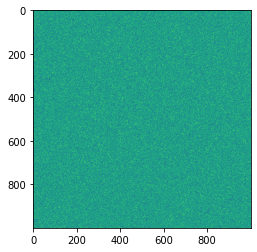

In [162]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pylab as plt

C=np.random.rand(1000000).reshape((1000,1000))
S=np.random.rand(1000000).reshape((1000,1000))

def function(s,c):
    return np.sin(S) + np.cos(S)+c

dc = function(S,C)

plt.imshow(dc)
plt.show()


ddtt = function(S,C)

In [ ]:

# create a simple white noise with increasing variance
from random import gauss
from random import seed
from matplotlib import pyplot
# seed pseudorandom number generator
seed(1)
# create dataset
data = [gauss(0, i*0.01) for i in range(0,100)]
# plot

pyplot.plot(data)
pyplot.show()

In [137]:

# create a simple white noise with increasing variance
from random import gauss
from random import seed
from matplotlib import pyplot

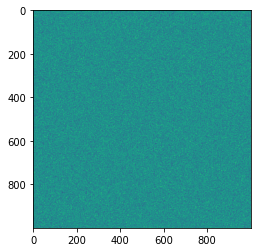

In [146]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pylab as plt

C=np.random.rand(1000000).reshape((1000,1000))
S=np.random.rand(1000000).reshape((1000,1000))

def function1(s,c):
    return gauss(2, (C+S)*2)

dc1 = function1(S,C)

plt.imshow(dc1)
plt.show()


dd = function1(S,C)

In [150]:
dd.shape

(1000, 1000)

In [149]:
X = dd[:,0:100]
y = dd[:,0:100]
X.shape

(1000, 100)

In [ ]:
dd.to_csv('garch.csv')

In [158]:
data44 = data.iloc[0:1000,0:1000]

In [159]:
# array to dataframe - predicts 

ad = pd.DataFrame(dd,
                   index=data44.index,
                   columns=data44.columns )


ad.shape

(1000, 1000)

In [165]:
# array to dataframe - predicts 

aadd = pd.DataFrame(ddtt,
                   index=data44.index,
                   columns=data44.columns )


aadd.shape

(1000, 1000)

In [160]:
ad.to_csv('garch.csv')

In [166]:
aadd.to_csv('sincos.csv')

In [ ]:
X = dd[:,0:100]
y = dd[:,0:100]

In [167]:
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor


# Create a random dataset
rng = np.random.RandomState(1)

#y += 0.5 - rng.rand(*y.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=990, test_size=10, random_state=4 # train_size=90 + test_size=10 = 100 array lenght
)

max_depth = 30
regr_multirf = MultiOutputRegressor(
    RandomForestRegressor(n_estimators=100, max_depth=max_depth, random_state=0,verbose = 1)
)
regr_multirf.fit(X_train, y_train)

regr_rf = RandomForestRegressor(n_estimators=100, max_depth=max_depth, random_state=2,verbose = 1)
regr_rf.fit(X_train, y_train)

# Predict on new data
y_multirf = regr_multirf.predict(X_test)
y_rf = regr_rf.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

In [169]:
y_rf.shape

(10, 100)

In [170]:
data2 = data.iloc[:1000,:100]

In [171]:
# array to dataframe - predicts 

a = pd.DataFrame(y_rf,
                   index=data2[0:10].index,
                   columns=data2[0:10].columns )


a.shape

(10, 100)

In [172]:
# array to dataframe - real values 

b = pd.DataFrame(y_test, 
                   index=data2[0:10].index,
                   columns=data2[0:10].columns )


b.shape

(10, 100)

In [173]:
from numpy import array
from permetrics.regression import Metrics
columns = list(a)
#for column in a.columns:
    #for column in b.columns:
for i in columns:    
## 1-D array
        y_true1 = a[i].to_numpy()
        y_pred1 = b[i].to_numpy()
        obj1 = Metrics(y_true1, y_pred1)
        
        d = obj1.mean_arctangent_absolute_percentage_error(clean=True, decimal=5)
        print(d)

## > 1-D array

0.20543
0.1838
0.18978
0.13461
0.20487
0.20667
0.14482
0.20186
0.18439
0.16266
0.19403
0.20447
0.14123
0.1453
0.18875
0.17548
0.18891
0.1121
0.18013
0.20748
0.1803
0.22636
0.22154
0.20498
0.21047
0.15756
0.22223
0.25732
0.23735
0.18329
0.17365
0.20155
0.17573
0.17087
0.19484
0.21825
0.27324
0.18686
0.17937
0.27004
0.16421
0.20807
0.19614
0.16532
0.10582
0.17545
0.19239
0.14636
0.1948
0.16958
0.18656
0.18193
0.20247
0.18299
0.2015
0.19363
0.22727
0.1505
0.16476
0.13219
0.15325
0.1599
0.18039
0.19005
0.12694
0.22206
0.24066
0.12373
0.21096
0.19739
0.21376
0.1633
0.23755
0.16762
0.14222
0.13596
0.2005
0.23829
0.22224
0.19082
0.22152
0.18467
0.29471
0.2662
0.20384
0.24487
0.11739
0.18723
0.09635
0.27001
0.25848
0.19327
0.15757
0.15879
0.21909
0.15858
0.19413
0.13661
0.20658
0.27956


In [174]:
from numpy import array
from permetrics.regression import Metrics

#columns = list(a) 
  
#for i in columns: 

#for column in a.columns:
    #for column in b.columns:
for i in columns:        
## 1-D array
        y_true1 = a[i].to_numpy()
        y_pred1 = b[i].to_numpy()

        obj1 = Metrics(y_true1, y_pred1)
        print(obj1.symmetric_mean_absolute_percentage_error(clean=True, decimal=2))

0.25
0.2
0.21
0.13
0.23
0.21
0.15
0.21
0.19
0.19
0.2
0.23
0.13
0.16
0.21
0.18
0.23
0.12
0.17
0.24
0.18
0.25
0.24
0.26
0.22
0.17
0.21
0.29
0.31
0.19
0.19
0.21
0.19
0.19
0.21
0.22
0.34
0.19
0.19
0.25
0.19
0.2
0.26
0.19
0.11
0.16
0.22
0.15
0.22
0.18
0.21
0.21
0.24
0.19
0.21
0.21
0.25
0.18
0.17
0.13
0.16
0.17
0.22
0.23
0.13
0.24
0.21
0.13
0.24
0.19
0.21
0.16
0.26
0.19
0.15
0.13
0.21
0.26
0.22
0.17
0.2
0.2
0.29
0.29
0.26
0.3
0.12
0.18
0.09
0.29
0.3
0.21
0.18
0.18
0.23
0.17
0.2
0.14
0.22
0.31


In [175]:

# recursive multi-step forecast with linear algorithms
from math import sqrt
from numpy import split
from numpy import array
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Lars
from sklearn.linear_model import LassoLars
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import SGDRegressor

In [176]:
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor


# Create a random dataset
rng = np.random.RandomState(1)

#y += 0.5 - rng.rand(*y.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=990, test_size=10, random_state=4
)

max_depth = 30
regr_multirf = MultiOutputRegressor(
    Lasso(random_state=0)
)
regr_multirf.fit(X_train, y_train)

regr_rf = Lasso(random_state=2)
regr_rf.fit(X_train, y_train)

# Predict on new data
y_multirf = regr_multirf.predict(X_test)
y_rfl = regr_rf.predict(X_test)

In [179]:
y_multirf

array([[5.4958882 , 6.77479667, 6.14623491, 5.29151289, 6.17546586,
        6.38854531, 6.489672  , 5.27022528, 6.08681251, 5.53785097,
        4.34176633, 6.30125815, 5.35613771, 5.34047296, 5.98319238,
        5.80674291, 5.03334651, 5.24372119, 5.92260452, 4.65951724,
        5.41878066, 5.04026929, 4.38627212, 3.89582309, 5.58723685,
        5.44838523, 5.76642985, 5.94813185, 3.97891047, 5.00989174,
        5.61702982, 5.11896146, 6.2720301 , 6.17336516, 5.58000476,
        6.71113312, 5.62730809, 5.52474835, 5.24849411, 5.83069872,
        4.50044314, 6.6381124 , 4.26733741, 4.08757058, 5.41290059,
        5.26380321, 5.72448727, 6.0278053 , 6.28777191, 5.86598722,
        4.84797661, 6.51763888, 4.79863696, 4.94483852, 6.65141244,
        5.44234775, 6.04866888, 5.32741067, 5.09505045, 5.50564358,
        4.28401248, 5.73535353, 4.31940234, 4.45059738, 5.56270064,
        4.6558976 , 6.40707365, 5.20801991, 5.41996051, 5.27445146,
        5.5109025 , 4.65269391, 6.71834547, 6.52

In [180]:
# array to dataframe - predicts 

a = pd.DataFrame(y_rf,
                   index=data2[0:10].index,
                   columns=data2[0:10].columns )


print(a.shape)
# array to dataframe - real values 

b = pd.DataFrame(y_test, 
                   index=data2[0:10].index,
                   columns=data2[0:10].columns )


print(b.shape)

(10, 100)
(10, 100)


In [181]:
from numpy import array
from permetrics.regression import Metrics
columns = list(a)
#for column in a.columns:
    #for column in b.columns:
for i in columns:    
## 1-D array
        y_true1 = a[i].to_numpy()
        y_pred1 = b[i].to_numpy()
        obj1 = Metrics(y_true1, y_pred1)
        
        d = obj1.mean_arctangent_absolute_percentage_error(clean=True, decimal=5)
        print(d)

## > 1-D array

0.20543
0.1838
0.18978
0.13461
0.20487
0.20667
0.14482
0.20186
0.18439
0.16266
0.19403
0.20447
0.14123
0.1453
0.18875
0.17548
0.18891
0.1121
0.18013
0.20748
0.1803
0.22636
0.22154
0.20498
0.21047
0.15756
0.22223
0.25732
0.23735
0.18329
0.17365
0.20155
0.17573
0.17087
0.19484
0.21825
0.27324
0.18686
0.17937
0.27004
0.16421
0.20807
0.19614
0.16532
0.10582
0.17545
0.19239
0.14636
0.1948
0.16958
0.18656
0.18193
0.20247
0.18299
0.2015
0.19363
0.22727
0.1505
0.16476
0.13219
0.15325
0.1599
0.18039
0.19005
0.12694
0.22206
0.24066
0.12373
0.21096
0.19739
0.21376
0.1633
0.23755
0.16762
0.14222
0.13596
0.2005
0.23829
0.22224
0.19082
0.22152
0.18467
0.29471
0.2662
0.20384
0.24487
0.11739
0.18723
0.09635
0.27001
0.25848
0.19327
0.15757
0.15879
0.21909
0.15858
0.19413
0.13661
0.20658
0.27956


In [183]:
from numpy import array
from permetrics.regression import Metrics

for column in a.columns:
    #for column in b.columns:
## 1-D array
        y_true1 = a[column].to_numpy()
        y_pred1 = b[column].to_numpy()

        obj1 = Metrics(y_true1, y_pred1)
        print(obj1.root_mean_squared_error(clean=True, decimal=5))

1.45807
1.2914
1.23115
1.0121
1.38138
1.42351
1.0384
1.28735
1.21712
1.04666
1.45834
1.35033
1.19343
1.03782
1.35142
1.26065
1.40045
0.79156
1.29142
1.23691
1.17973
1.46383
1.51422
1.47898
1.43172
1.03454
1.50938
1.53575
1.76791
1.28999
1.21713
1.27737
1.13631
1.21976
1.31196
1.39929
1.75652
1.31753
1.18546
1.90182
1.14223
1.45827
1.59252
1.35677
0.67269
1.44792
1.24064
0.97433
1.27382
1.08095
1.31916
1.27996
1.3974
1.38536
1.32144
1.34957
1.41655
1.10939
1.06443
0.90977
1.11882
1.06473
1.24881
1.29731
0.89
1.35573
1.6194
0.81282
1.41131
1.33539
1.561
1.04752
1.59347
1.28307
0.92538
0.93305
1.24714
1.4497
1.50142
1.34965
1.55787
1.25198
1.84639
1.78636
1.55087
1.61409
0.71026
1.17173
0.67929
1.77938
1.68128
1.29138
1.11183
1.35245
1.45517
1.3095
1.29238
0.91817
1.37736
1.78941


In [184]:
from numpy import array
from permetrics.regression import Metrics

#columns = list(a) 
  
#for i in columns: 

#for column in a.columns:
    #for column in b.columns:
for i in columns:        
## 1-D array
        y_true1 = a[i].to_numpy()
        y_pred1 = b[i].to_numpy()

        obj1 = Metrics(y_true1, y_pred1)
        print(obj1.symmetric_mean_absolute_percentage_error(clean=True, decimal=2))


0.25
0.2
0.21
0.13
0.23
0.21
0.15
0.21
0.19
0.19
0.2
0.23
0.13
0.16
0.21
0.18
0.23
0.12
0.17
0.24
0.18
0.25
0.24
0.26
0.22
0.17
0.21
0.29
0.31
0.19
0.19
0.21
0.19
0.19
0.21
0.22
0.34
0.19
0.19
0.25
0.19
0.2
0.26
0.19
0.11
0.16
0.22
0.15
0.22
0.18
0.21
0.21
0.24
0.19
0.21
0.21
0.25
0.18
0.17
0.13
0.16
0.17
0.22
0.23
0.13
0.24
0.21
0.13
0.24
0.19
0.21
0.16
0.26
0.19
0.15
0.13
0.21
0.26
0.22
0.17
0.2
0.2
0.29
0.29
0.26
0.3
0.12
0.18
0.09
0.29
0.3
0.21
0.18
0.18
0.23
0.17
0.2
0.14
0.22
0.31


In [185]:
from numpy import array
from permetrics.regression import Metrics

#for column in a.columns:
    #for column in b.columns:
## 1-D array
for i in columns: 
        y_true1 = a[i].to_numpy()
        y_pred1 = b[i].to_numpy()
        obj1 = Metrics(y_true1, y_pred1)
        
        print(obj1.mean_absolute_error(clean=True, decimal=5))
      
        ## > 1-D array
    

1.14893
1.03689
1.03629
0.7468
1.14652
1.17228
0.80084
1.12422
1.03482
0.89997
1.0967
1.14986
0.80046
0.81672
1.04957
0.99152
1.05235
0.6127
1.02706
1.1323
1.0065
1.26562
1.28375
1.14845
1.18997
0.85727
1.25715
1.44937
1.35347
1.02819
0.96283
1.09234
0.97247
0.96366
1.0835
1.24098
1.56618
1.05968
0.99755
1.56696
0.92026
1.17884
1.12953
0.94251
0.58109
1.02729
1.0316
0.81377
1.0785
0.92237
1.04292
1.01507
1.12331
1.05129
1.1286
1.07669
1.27658
0.82455
0.92947
0.71399
0.85872
0.87307
0.98032
1.06409
0.6954
1.23194
1.37499
0.67324
1.18068
1.12922
1.23289
0.89508
1.33936
0.94649
0.7796
0.75421
1.10249
1.32934
1.25725
1.06681
1.24638
1.02526
1.67848
1.53006
1.15686
1.37701
0.64694
1.04877
0.52938
1.53799
1.45752
1.08882
0.88202
0.89459
1.22796
0.89683
1.08439
0.7485
1.15948
1.56372


In [186]:
import numpy as np 
import pandas as pd 
import xgboost as xgb
from sklearn.multioutput import MultiOutputRegressor

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=990, test_size=10, random_state=4
)

# fitting
multioutputregressor = MultiOutputRegressor(xgb.XGBRegressor(objective='reg:squarederror')).fit(X_train, y_train)
# Predict on new data
y_multirf1 = multioutputregressor.predict(X_test)
# predicting
#print(np.mean((multioutputregressor.predict(X) - y)**2, axis=0))

In [187]:

# Predict on new data
y_multirf1 = multioutputregressor.predict(X_test)


In [188]:
y_multirf1

array([[5.598524 , 8.152205 , 6.83706  , 5.170747 , 6.931771 , 7.4899316,
        7.7156286, 5.115662 , 6.722575 , 5.661499 , 3.2912018, 7.293274 ,
        5.2824373, 5.275618 , 6.615426 , 6.152291 , 4.6879263, 5.0573335,
        6.415841 , 3.8841457, 5.483193 , 4.645516 , 2.9976265, 2.336945 ,
        5.772199 , 5.555753 , 6.1611934, 6.4260335, 2.4786763, 4.538291 ,
        5.853812 , 4.8679023, 7.255659 , 6.877436 , 5.7197995, 7.9784966,
        5.701673 , 5.556418 , 5.0233417, 6.200831 , 3.6061375, 7.9581323,
        2.9680264, 2.4586935, 5.42677  , 5.081807 , 6.08571  , 6.776345 ,
        7.308052 , 6.411256 , 4.197778 , 7.5751157, 4.1458006, 4.3754506,
        7.862672 , 5.5439005, 6.7445483, 5.3248186, 4.768099 , 5.61771  ,
        3.2807047, 6.104104 , 3.2274199, 3.4191096, 5.722817 , 3.8446941,
        7.4678993, 5.0128255, 5.509928 , 5.138303 , 5.544277 , 3.933356 ,
        8.243527 , 7.5523577, 4.569524 , 6.098959 , 7.2125125, 2.9404511,
        7.2864614, 6.3666787, 6.764623

In [189]:
# array to dataframe - predicts 

a = pd.DataFrame(y_multirf1,
                   index=data2[0:10].index,
                   columns=data2[0:10].columns )


print(a.shape)
# array to dataframe - real values 

b = pd.DataFrame(y_test, 
                   index=data2[0:10].index,
                   columns=data2[0:10].columns )


print(b.shape)

(10, 100)
(10, 100)


In [190]:
from numpy import array
from permetrics.regression import Metrics
columns = list(a)
#for column in a.columns:
    #for column in b.columns:
for i in columns:    
## 1-D array
        y_true1 = a[i].to_numpy()
        y_pred1 = b[i].to_numpy()
        obj1 = Metrics(y_true1, y_pred1)
        
        d = obj1.mean_arctangent_absolute_percentage_error(clean=True, decimal=5)
        print(d)

## > 1-D array

0.00997
0.00626
0.00594
0.00524
0.00677
0.00615
0.00337
0.00581
0.00504
0.00339
0.00351
0.00556
0.00585
0.00666
0.00747
0.00465
0.0123
0.00529
0.00544
0.01173
0.00334
0.00784
0.00667
0.00731
0.0059
0.00338
0.00522
0.01101
0.00655
0.00417
0.00332
0.0055
0.0038
0.00643
0.0054
0.00409
0.01082
0.00501
0.00666
0.00527
0.00717
0.0051
0.00499
0.01095
0.00619
0.00594
0.01056
0.00564
0.0081
0.00295
0.0057
0.00671
0.00535
0.00808
0.0069
0.00763
0.0062
0.01085
0.00726
0.00439
0.00532
0.00611
0.00528
0.00789
0.00524
0.00651
0.00375
0.00478
0.009
0.0048
0.01111
0.00332
0.00514
0.0037
0.00491
0.0038
0.00762
0.00603
0.0033
0.00416
0.00421
0.00585
0.00542
0.00606
0.0084
0.00472
0.00618
0.00566
0.00349
0.00553
0.00782
0.00764
0.00232
0.00536
0.00646
0.00291
0.00588
0.00646
0.01228
0.00467


In [191]:
from numpy import array
from permetrics.regression import Metrics

#columns = list(a) 
  
#for i in columns: 

#for column in a.columns:
    #for column in b.columns:
for i in columns:        
## 1-D array
        y_true1 = a[i].to_numpy()
        y_pred1 = b[i].to_numpy()

        obj1 = Metrics(y_true1, y_pred1)
        print(obj1.symmetric_mean_absolute_percentage_error(clean=True, decimal=6))


0.01001
0.006191
0.005931
0.005235
0.006801
0.00616
0.003378
0.005827
0.005024
0.0034
0.003516
0.005577
0.00586
0.006659
0.007432
0.004667
0.012574
0.005312
0.005417
0.011596
0.003344
0.007889
0.006647
0.007306
0.005936
0.00337
0.005247
0.011133
0.006595
0.004159
0.003335
0.005536
0.003811
0.006407
0.00542
0.004098
0.010793
0.005016
0.006638
0.005264
0.007172
0.005096
0.005008
0.010826
0.006201
0.00593
0.01054
0.005663
0.008122
0.002954
0.005718
0.00674
0.005341
0.008044
0.006926
0.007697
0.006208
0.010922
0.007261
0.004386
0.005348
0.006068
0.005273
0.00789
0.005241
0.006482
0.003746
0.004772
0.009104
0.004798
0.01107
0.003325
0.005143
0.003719
0.004907
0.00379
0.007616
0.006021
0.003312
0.004156
0.00421
0.005856
0.005422
0.006072
0.008445
0.00471
0.006183
0.005665
0.003483
0.005532
0.007843
0.007627
0.002323
0.005362
0.006468
0.002907
0.005907
0.006449
0.012193
0.004657


In [192]:
from numpy import array
from permetrics.regression import Metrics

for column in a.columns:
    #for column in b.columns:
## 1-D array
        y_true1 = a[column].to_numpy()
        y_pred1 = b[column].to_numpy()

        obj1 = Metrics(y_true1, y_pred1)
        print(obj1.root_mean_squared_error(clean=True, decimal=5))

0.0527
0.03702
0.04201
0.03509
0.04117
0.04981
0.02112
0.03381
0.03588
0.01923
0.02521
0.02817
0.04081
0.04314
0.04466
0.03159
0.05693
0.03083
0.04875
0.06107
0.02213
0.04807
0.04388
0.03665
0.05406
0.0186
0.04026
0.05985
0.03204
0.03044
0.02064
0.03686
0.02334
0.03825
0.0344
0.02752
0.04956
0.02742
0.05234
0.05556
0.04277
0.04023
0.0235
0.05367
0.03784
0.04251
0.05916
0.03069
0.04778
0.02099
0.03267
0.03612
0.02668
0.04565
0.04781
0.04558
0.03917
0.05288
0.04894
0.02671
0.03039
0.04085
0.02958
0.04027
0.03334
0.04529
0.02818
0.02958
0.05414
0.03269
0.06101
0.02129
0.02453
0.02328
0.03364
0.03429
0.04163
0.03814
0.02275
0.03265
0.03689
0.03405
0.0374
0.05094
0.04387
0.02617
0.04324
0.04226
0.02369
0.02966
0.04281
0.04772
0.01444
0.02833
0.03758
0.02072
0.03552
0.04051
0.07353
0.02724


In [193]:
from numpy import array
from permetrics.regression import Metrics
columns = list(a) 
#for column in a.columns:
    #for column in b.columns:
## 1-D array
for i in columns: 
        y_true1 = a[i].to_numpy()
        y_pred1 = b[i].to_numpy()
        obj1 = Metrics(y_true1, y_pred1)
        
        print(obj1.mean_absolute_error(clean=True, decimal=5))
      
        ## > 1-D array

0.04595
0.02468
0.03254
0.02537
0.02976
0.03886
0.01606
0.0294
0.02747
0.01564
0.01905
0.02419
0.03181
0.03288
0.03378
0.02334
0.03782
0.02673
0.03221
0.04468
0.01921
0.03678
0.03384
0.02887
0.03299
0.01702
0.02921
0.04672
0.02387
0.0228
0.01457
0.02638
0.01777
0.03148
0.02472
0.02244
0.03809
0.02419
0.03709
0.03574
0.03611
0.03274
0.01841
0.04358
0.031
0.0349
0.04071
0.02875
0.04001
0.01632
0.02599
0.03063
0.02294
0.03562
0.03452
0.0331
0.0303
0.04851
0.04022
0.02241
0.02433
0.0273
0.02452
0.03449
0.02734
0.03407
0.02419
0.02393
0.03707
0.02525
0.05615
0.0181
0.02274
0.01527
0.02633
0.0226
0.03683
0.02795
0.0166
0.02624
0.02521
0.0298
0.0313
0.03703
0.03401
0.01941
0.03533
0.03358
0.01964
0.02665
0.03598
0.03707
0.01131
0.0234
0.02785
0.01601
0.02755
0.03473
0.05096
0.02038


In [196]:
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor


# Create a random dataset
rng = np.random.RandomState(1)

#y += 0.5 - rng.rand(*y.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=990, test_size=10, random_state=4
)

max_depth = 30
regr_multirf = MultiOutputRegressor(
    Lasso()
)
regr_multirf.fit(X_train, y_train)

regr_rf = Lasso()
regr_rf.fit(X_train, y_train)

# Predict on new data
y_multirf = regr_multirf.predict(X_test)
y_rfl = regr_rf.predict(X_test)

In [197]:
# array to dataframe - predicts 

a = pd.DataFrame(y_multirf,
                   index=data2[0:10].index,
                   columns=data2[0:10].columns )


print(a.shape)
# array to dataframe - real values 

b = pd.DataFrame(y_test, 
                   index=data2[0:10].index,
                   columns=data2[0:10].columns )


print(b.shape)

from numpy import array
from permetrics.regression import Metrics

for column in a.columns:
    #for column in b.columns:
## 1-D array
        y_true1 = a[column].to_numpy()
        y_pred1 = b[column].to_numpy()

        obj1 = Metrics(y_true1, y_pred1)
        print(obj1.root_mean_squared_error(clean=True, decimal=5))


(10, 100)
(10, 100)
0.84001
0.72531
0.75553
0.58156
0.66418
0.79983
0.55786
0.69311
0.64683
0.57589
0.79375
0.72007
0.60043
0.55434
0.81542
0.6529
0.77844
0.41955
0.69488
0.67916
0.62591
0.76649
0.79875
0.79388
0.79833
0.53895
0.74839
0.77912
0.94393
0.66592
0.62115
0.62087
0.6301
0.66444
0.71945
0.75638
0.88621
0.69235
0.60945
0.9391
0.63096
0.80819
0.8632
0.71909
0.36581
0.7787
0.73036
0.60024
0.68542
0.63239
0.70459
0.71651
0.79922
0.71791
0.73545
0.77301
0.82585
0.58283
0.55558
0.44609
0.61269
0.59746
0.67687
0.68321
0.47807
0.74252
0.86745
0.45499
0.74955
0.7684
0.84644
0.52809
0.89283
0.70088
0.49913
0.48898
0.73534
0.79127
0.79306
0.74229
0.79949
0.69984
1.02376
0.88488
0.82304
0.86339
0.40481
0.66815
0.4
0.99766
0.93088
0.70503
0.58744
0.6772
0.81698
0.75088
0.71174
0.51667
0.78492
0.92786


In [198]:
from numpy import array
from permetrics.regression import Metrics

for column in a.columns:
    #for column in b.columns:
## 1-D array
        y_true1 = a[column].to_numpy()
        y_pred1 = b[column].to_numpy()

        obj1 = Metrics(y_true1, y_pred1)
        print(obj1.root_mean_squared_error(clean=True, decimal=5))

0.84001
0.72531
0.75553
0.58156
0.66418
0.79983
0.55786
0.69311
0.64683
0.57589
0.79375
0.72007
0.60043
0.55434
0.81542
0.6529
0.77844
0.41955
0.69488
0.67916
0.62591
0.76649
0.79875
0.79388
0.79833
0.53895
0.74839
0.77912
0.94393
0.66592
0.62115
0.62087
0.6301
0.66444
0.71945
0.75638
0.88621
0.69235
0.60945
0.9391
0.63096
0.80819
0.8632
0.71909
0.36581
0.7787
0.73036
0.60024
0.68542
0.63239
0.70459
0.71651
0.79922
0.71791
0.73545
0.77301
0.82585
0.58283
0.55558
0.44609
0.61269
0.59746
0.67687
0.68321
0.47807
0.74252
0.86745
0.45499
0.74955
0.7684
0.84644
0.52809
0.89283
0.70088
0.49913
0.48898
0.73534
0.79127
0.79306
0.74229
0.79949
0.69984
1.02376
0.88488
0.82304
0.86339
0.40481
0.66815
0.4
0.99766
0.93088
0.70503
0.58744
0.6772
0.81698
0.75088
0.71174
0.51667
0.78492
0.92786


In [200]:
from numpy import array
from permetrics.regression import Metrics

#for column in a.columns:
    #for column in b.columns:
## 1-D array
for i in columns: 
        y_true1 = a[i].to_numpy()
        y_pred1 = b[i].to_numpy()
        obj1 = Metrics(y_true1, y_pred1)
        
        print(obj1.mean_absolute_error(clean=True, decimal=5))
      
 

0.64006
0.56298
0.6366
0.45025
0.53644
0.66446
0.41347
0.60918
0.53497
0.48264
0.59824
0.62914
0.4105
0.44623
0.60904
0.513
0.63108
0.31581
0.54405
0.61352
0.53558
0.67346
0.69011
0.64409
0.66777
0.44033
0.62828
0.7323
0.69876
0.5248
0.50522
0.53637
0.55308
0.54127
0.61642
0.66267
0.79208
0.5572
0.51711
0.78256
0.51863
0.6439
0.63384
0.50401
0.3232
0.57725
0.62375
0.4842
0.58322
0.53212
0.56744
0.57252
0.63023
0.56039
0.64563
0.60631
0.75459
0.43443
0.48209
0.36693
0.46245
0.50376
0.53898
0.56191
0.39155
0.68288
0.73397
0.3824
0.59989
0.64134
0.67649
0.45934
0.72378
0.53631
0.41719
0.41058
0.64625
0.72812
0.66483
0.58371
0.63456
0.58231
0.95026
0.77014
0.61824
0.7522
0.37147
0.60654
0.31471
0.85172
0.81912
0.61212
0.49306
0.47341
0.68624
0.52171
0.61006
0.45102
0.65126
0.79312


In [201]:
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor


# Create a random dataset
rng = np.random.RandomState(1)

#y += 0.5 - rng.rand(*y.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=990, test_size=10, random_state=4
)

max_depth = 30
regr_multirf = MultiOutputRegressor(
    Ridge(alpha=4.0,random_state=0)
)
regr_multirf.fit(X_train, y_train)

regr_rf = Ridge(random_state=2)
regr_rf.fit(X_train, y_train)

# Predict on new data
y_multirf = regr_multirf.predict(X_test)
y_rfl = regr_rf.predict(X_test)

In [202]:
# array to dataframe - predicts 

a = pd.DataFrame(y_multirf,
                   index=data2[0:10].index,
                   columns=data2[0:10].columns )


print(a.shape)
# array to dataframe - real values 

b = pd.DataFrame(y_test, 
                   index=data2[0:10].index,
                   columns=data2[0:10].columns )


print(b.shape)

from numpy import array
from permetrics.regression import Metrics

for column in a.columns:
    #for column in b.columns:
## 1-D array
        y_true1 = a[column].to_numpy()
        y_pred1 = b[column].to_numpy()

        obj1 = Metrics(y_true1, y_pred1)
        print(obj1.root_mean_squared_error(clean=True, decimal=5))

(10, 100)
(10, 100)
0.00395
0.00297
0.00413
0.00276
0.00307
0.00391
0.00221
0.00309
0.00297
0.00291
0.0035
0.0037
0.0029
0.00244
0.00357
0.00289
0.00367
0.00169
0.00334
0.00338
0.00274
0.00349
0.00432
0.00416
0.00322
0.00229
0.00337
0.00338
0.00406
0.00351
0.00329
0.00349
0.00346
0.00334
0.0031
0.00297
0.0038
0.00304
0.0033
0.00488
0.00292
0.00355
0.00396
0.00349
0.0023
0.00352
0.00289
0.00288
0.00267
0.00308
0.00297
0.00343
0.00399
0.00329
0.00395
0.00381
0.00441
0.00338
0.00306
0.00198
0.00268
0.00259
0.00335
0.00267
0.00224
0.00343
0.00407
0.00204
0.00321
0.00381
0.00404
0.00281
0.00457
0.0034
0.00243
0.00276
0.00282
0.00401
0.0035
0.00368
0.00371
0.00372
0.00398
0.0046
0.00433
0.00477
0.00216
0.00298
0.00233
0.00444
0.00463
0.00342
0.00256
0.00264
0.00399
0.00337
0.00345
0.00243
0.00483
0.00447


In [203]:
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor


# Create a random dataset
rng = np.random.RandomState(1)

#y += 0.5 - rng.rand(*y.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=990, test_size=10, random_state=4
)

max_depth = 30
regr_multirf = MultiOutputRegressor(
    ElasticNet(alpha=2.0,random_state=0)
)
regr_multirf.fit(X_train, y_train)

regr_rf = ElasticNet(random_state=2)
regr_rf.fit(X_train, y_train)

# Predict on new data
y_multirf = regr_multirf.predict(X_test)
y_rfl = regr_rf.predict(X_test)

In [204]:
# array to dataframe - predicts 

a = pd.DataFrame(y_multirf,
                   index=data2[0:10].index,
                   columns=data2[0:10].columns )


print(a.shape)
# array to dataframe - real values 

b = pd.DataFrame(y_test, 
                   index=data2[0:10].index,
                   columns=data2[0:10].columns )


print(b.shape)

from numpy import array
from permetrics.regression import Metrics

for column in a.columns:
    #for column in b.columns:
## 1-D array
        y_true1 = a[column].to_numpy()
        y_pred1 = b[column].to_numpy()

        obj1 = Metrics(y_true1, y_pred1)
        print(obj1.root_mean_squared_error(clean=True, decimal=5))

(10, 100)
(10, 100)
1.09076
0.9565
1.00353
0.77758
0.87921
1.05433
0.7311
0.93653
0.85677
0.74836
1.05119
0.9389
0.80664
0.73305
1.05641
0.85921
1.06217
0.55171
0.92442
0.89263
0.83279
1.01804
1.04343
1.06768
1.05795
0.70993
0.99736
1.03911
1.246
0.87209
0.82418
0.83388
0.82457
0.89758
0.94171
1.00073
1.18677
0.93214
0.78495
1.26971
0.84367
1.05947
1.13996
0.93493
0.48641
1.03902
0.97557
0.77904
0.9091
0.82224
0.91797
0.95269
1.04364
0.94661
0.9885
1.00164
1.08859
0.776
0.7449
0.59417
0.82788
0.78644
0.89627
0.90704
0.63318
0.98171
1.14863
0.61227
0.99338
0.99887
1.13472
0.70049
1.16385
0.94511
0.67099
0.64658
0.95432
1.05043
1.06258
0.96807
1.05343
0.90363
1.33796
1.18212
1.09285
1.1392
0.52955
0.8723
0.5379
1.31096
1.21463
0.93003
0.77955
0.89291
1.08083
0.96711
0.92832
0.69388
1.00518
1.2439


In [207]:
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor


# Create a random dataset
rng = np.random.RandomState(1)

#y += 0.5 - rng.rand(*y.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=990, test_size=10, random_state=4
)

max_depth = 30
regr_multirf = MultiOutputRegressor(
    Lars()
)
regr_multirf.fit(X_train, y_train)

regr_rf = Lars()
regr_rf.fit(X_train, y_train)

# Predict on new data
y_multirf = regr_multirf.predict(X_test)
y_rfl = regr_rf.predict(X_test)

D:\anaconda3\envs\r_env\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
D:\anaconda3\envs\r_env\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipe

D:\anaconda3\envs\r_env\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
D:\anaconda3\envs\r_env\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipe

In [208]:
# array to dataframe - predicts 

a = pd.DataFrame(y_multirf,
                   index=data2[0:10].index,
                   columns=data2[0:10].columns )


print(a.shape)
# array to dataframe - real values 

b = pd.DataFrame(y_test, 
                   index=data2[0:10].index,
                   columns=data2[0:10].columns )


print(b.shape)

from numpy import array
from permetrics.regression import Metrics

for column in a.columns:
    #for column in b.columns:
## 1-D array
        y_true1 = a[column].to_numpy()
        y_pred1 = b[column].to_numpy()

        obj1 = Metrics(y_true1, y_pred1)
        print(obj1.root_mean_squared_error(clean=True, decimal=5))

(10, 100)
(10, 100)
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [209]:
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor


# Create a random dataset
rng = np.random.RandomState(1)

#y += 0.5 - rng.rand(*y.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=990, test_size=10, random_state=4
)

max_depth = 30
regr_multirf = MultiOutputRegressor(
    Lars()
)
regr_multirf.fit(X_train, y_train)

regr_rf = Lars()
regr_rf.fit(X_train, y_train)

# Predict on new data
y_multirf = regr_multirf.predict(X_test)
y_rfl = regr_rf.predict(X_test)

D:\anaconda3\envs\r_env\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
D:\anaconda3\envs\r_env\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipe

D:\anaconda3\envs\r_env\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
D:\anaconda3\envs\r_env\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipe

In [212]:
# array to dataframe - predicts 

a = pd.DataFrame(y_multirf,
                   index=data2[0:10].index,
                   columns=data2[0:10].columns )


print(a.shape)
# array to dataframe - real values 

b = pd.DataFrame(y_test, 
                   index=data2[0:10].index,
                   columns=data2[0:10].columns )


print(b.shape)

from numpy import array
from permetrics.regression import Metrics

for column in a.columns:
    #for column in b.columns:
## 1-D array
        y_true1 = a[column].to_numpy()
        y_pred1 = b[column].to_numpy()

        obj1 = Metrics(y_true1, y_pred1)
        print(obj1.mean_absolute_error(clean=True, decimal=5))
      
        ## > 1-D array
        

(10, 100)
(10, 100)
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [213]:
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor


# Create a random dataset
rng = np.random.RandomState(1)

#y += 0.5 - rng.rand(*y.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=90, test_size=10, random_state=4
)

max_depth = 30
regr_multirf = MultiOutputRegressor(
    LassoLars(alpha=8.0)
)
regr_multirf.fit(X_train, y_train)

regr_rf = LassoLars(alpha=8.0)
regr_rf.fit(X_train, y_train)

# Predict on new data
y_multirf = regr_multirf.predict(X_test)
y_rfl = regr_rf.predict(X_test)

D:\anaconda3\envs\r_env\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
D:\anaconda3\envs\r_env\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preproces

In [215]:
# array to dataframe - predicts 

a = pd.DataFrame(y_multirf,
                   index=data2[0:10].index,
                   columns=data2[0:10].columns )


print(a.shape)
# array to dataframe - real values 

b = pd.DataFrame(y_test, 
                   index=data2[0:10].index,
                   columns=data2[0:10].columns )


print(b.shape)

from numpy import array
from permetrics.regression import Metrics

for column in a.columns:
    #for column in b.columns:
## 1-D array
        y_true1 = a[column].to_numpy()
        y_pred1 = b[column].to_numpy()

        obj1 = Metrics(y_true1, y_pred1)
        print(obj1.root_mean_squared_error(clean=True, decimal=5))

(10, 100)
(10, 100)
1.53619
1.41694
1.4838
1.18073
1.25534
1.56746
1.04237
1.44904
1.26224
1.15419
1.57894
1.35217
1.25718
1.06985
1.49867
1.25613
1.64089
0.77653
1.46499
1.17722
1.28144
1.55071
1.50359
1.62073
1.56845
1.03563
1.45313
1.63192
1.80487
1.27304
1.22907
1.26321
1.20795
1.38175
1.3721
1.54798
1.93808
1.44881
1.08897
1.94535
1.29397
1.47137
1.65747
1.32544
0.7251
1.48522
1.43612
1.13469
1.3444
1.18155
1.46419
1.34635
1.53011
1.38693
1.50866
1.42041
1.64575
1.05286
1.12037
0.88109
1.28048
1.14988
1.48742
1.42348
0.93874
1.42803
1.64301
0.94266
1.4467
1.47404
1.76514
1.04852
1.68646
1.45062
1.03624
0.89491
1.37551
1.56246
1.62438
1.48141
1.52851
1.30153
1.92095
1.77979
1.62684
1.65831
0.82047
1.26216
0.80163
1.92664
1.76397
1.36525
1.11446
1.31907
1.60859
1.35657
1.34249
1.05488
1.39632
1.89342


In [216]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.cluster import OPTICS

# Create a random dataset
rng = np.random.RandomState(1)

#y += 0.5 - rng.rand(*y.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=90, test_size=10, random_state=4
)

max_depth = 30
regr_multirf = MultiOutputRegressor(
    LinearRegression()
)
regr_multirf.fit(X_train, y_train)

regr_rf = LinearRegression()
regr_rf.fit(X_train, y_train)

# Predict on new data
y_multirf = regr_multirf.predict(X_test)
y_rfl = regr_rf.predict(X_test)

In [217]:
a = pd.DataFrame(y_multirf,
                   index=data2[0:10].index,
                   columns=data2[0:10].columns )


print(a.shape)
# array to dataframe - real values 

b = pd.DataFrame(y_test, 
                   index=data2[0:10].index,
                   columns=data2[0:10].columns )


print(b.shape)

from numpy import array
from permetrics.regression import Metrics

for column in a.columns:
    #for column in b.columns:
## 1-D array
        y_true1 = a[column].to_numpy()
        y_pred1 = b[column].to_numpy()

        obj1 = Metrics(y_true1, y_pred1)
        print(obj1.root_mean_squared_error(clean=True, decimal=5))

(10, 100)
(10, 100)
0.37327
0.39689
0.40554
0.42313
0.47576
0.59621
0.52393
0.23549
0.71352
0.38776
0.47348
0.35893
0.61178
0.45428
0.63918
0.35209
0.40017
0.51436
0.53562
0.44674
0.50345
0.28234
0.58802
0.62788
0.54378
0.31816
0.23856
0.55731
0.61483
0.26511
0.54805
0.65801
0.84833
0.81859
0.54273
0.31932
0.50003
0.44032
0.4249
0.57166
0.28607
0.4797
0.3813
0.34862
0.4653
0.4815
0.59374
0.42202
0.46896
0.34063
0.32921
0.47738
0.49327
0.33657
0.16498
0.26051
0.45898
0.41444
0.34067
0.45638
0.2964
0.4131
0.68125
0.53472
0.23254
0.25426
0.47124
0.52221
0.19498
0.46987
0.52679
0.24262
0.31953
0.28329
0.4034
0.4684
0.54111
0.33597
0.50541
0.31134
0.33081
0.81814
0.50824
0.38248
0.45938
0.43278
0.40418
0.47062
0.27686
0.37633
0.44558
0.4835
0.84112
0.53375
0.35733
0.31083
0.42693
0.58413
0.39174
0.4774


In [17]:
!git clone https://github.com/jxx123/fireTS.git
!cd fireTS
!pip install -e .

Cloning into 'fireTS'...
ERROR: File "setup.py" not found. Directory cannot be installed in editable mode: C:\Users\mucle


In [18]:
!pip install fireTS

In [21]:
import os
import sys
sys.path.insert(0, os.path.abspath('/fireTS'))